# Positional Encoding

In [1]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import session_info
sns.set()

#               Configuración matplotlib theme
#=============================================================
plt.style.use('fivethirtyeight') 
plt.rcParams["figure.figsize"] = 16,9
##plt.rc('text', usetex=True)
plt.rc('font', family='serif')


**La posición de las palabras en una oración porta información semántica que hace posible el entendimiento entre seres humanos. Como consecuencia, esta posición ha de ser relevante en todos los modelos IA que esten enfocados en NLP, una de éstas técnicas usadas  en modelos llamados Transformers se analiza a continuación** 

>Haciendo uso delas funciones seno y coseno, podemos hacer un encoding posicional, donde para cada celda del vector encoding i tendrémos definida una onda con una frecuencia distinta y dependiente de dicha posición i. A posteriori para cada palabra con su posición definida en el texto irémos cogiendo los valores de esas ondas pertenecientes a esa posición. De esta forma aseguramos la unicidad de cada uno de los vectores encoding. De forma visual:

![](\img\enc.jpg)


$$ PE(P,k)= \left\{ \begin{array}{lcc}
              sin(\frac{P}{1000^\frac{2i}{d}}) & si  & P & es& impar \\
             \\ cos(\frac{P}{1000^\frac{2i}{d}}) & si  & P &es& par \\
             \end{array}
   \right. $$

   Donde:

   * d: dimensión del embedding
   * i: coordenada del vector encoding
   * P: posición 

In [41]:
def getPositionEncoding(seq_len, d, n=10000):
    """                                                                                                                 
    Función para obtener el encoding vector para un vector embedding 
    perteneciente a un texto         
    
    ---> El vector posición obligatoriamente tiene que tener la misma longitud
    que el vector de embedding

    Args:                                                                                                               
         seq_len: longitud máxima del texto a posicionar
         d:dimensión del vector de embedding (depende de la cantidad de palabras distinas)
         n: numero natural aleatorio (en el papper original de transformers 100000)                                                                      
 
    Returns:                                                                                                            
        P: Matriz de Position Encoding [seq_len, d]                                                                            
 
    Example:                                                                                                            
        >>> P = getPositionEncoding(seq_len=50, d=200, n=100)
    """ 
    P = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P
 


In [55]:
#Obtenemos un vector ejemplo
A = getPositionEncoding(seq_len=30, d=216, n=10000)

In [88]:
# Mostramos el ejemplo de un vector Encoding
print(A[1])

[8.41470985e-01 5.40302306e-01 7.94542818e-01 6.07208128e-01
 7.46769152e-01 6.65083328e-01 6.99189845e-01 7.14936053e-01
 6.52569790e-01 7.57728625e-01 6.07454463e-01 7.94354502e-01
 5.64216732e-01 8.25626719e-01 5.23095512e-01 8.52274067e-01
 4.84227190e-01 8.74942300e-01 4.47670835e-01 8.94198425e-01
 4.13428193e-01 9.10536726e-01 3.81459399e-01 9.24385594e-01
 3.51695189e-01 9.36114573e-01 3.24046320e-01 9.46041216e-01
 2.98410755e-01 9.54437542e-01 2.74679091e-01 9.61535957e-01
 2.52738603e-01 9.67534598e-01 2.32476219e-01 9.72602081e-01
 2.13780666e-01 9.76881685e-01 1.96543972e-01 9.80495011e-01
 1.80662486e-01 9.83545152e-01 1.66037531e-01 9.86119434e-01
 1.52575780e-01 9.88291774e-01 1.40189423e-01 9.90124702e-01
 1.28796193e-01 9.91671085e-01 1.18319280e-01 9.92975603e-01
 1.08687166e-01 9.94076003e-01 9.98334166e-02 9.95004165e-01
 9.16964388e-02 9.95787007e-01 8.42192144e-02 9.96447251e-01
 7.73490316e-02 9.97004076e-01 7.10372126e-02 9.97473666e-01
 6.52388453e-02 9.978696

<span style='background :green' > Representamos el vector Encoding en con un mapa de calor donde cada fila representa el propio vector posición para cada una de las posiciones del embedding </span>

Text(74.66, 0.5, 'sequence length')

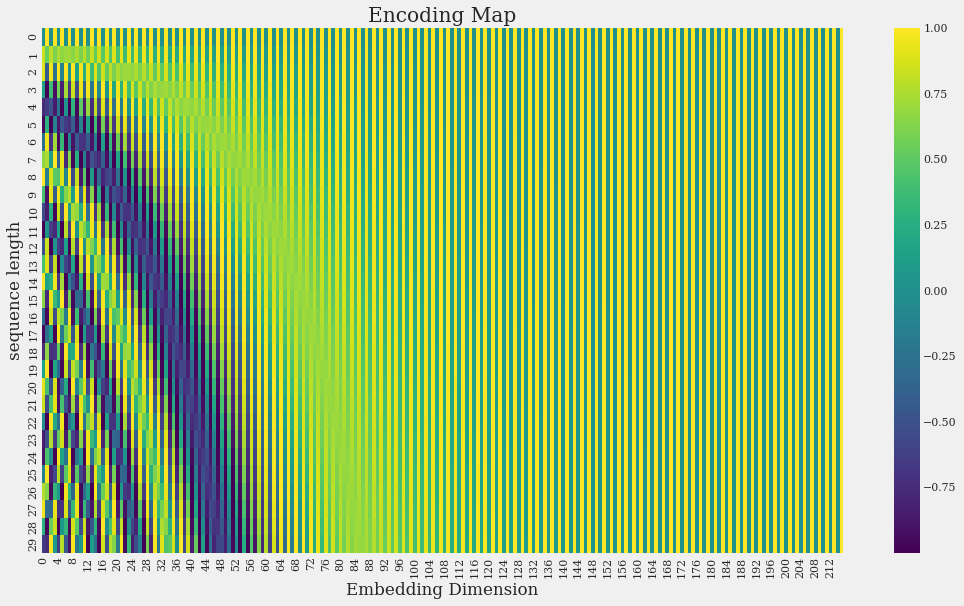

In [84]:
plt.figure()
sns.heatmap(A,cmap='viridis')
plt.title("Encoding Map")
plt.xlabel("Embedding Dimension")
plt.ylabel("sequence length") 

<span style='background :green' > Otra de las formas de visualizar esta técnica es fijando la posición de la celda del vector encoding, por consiguiente también la longitud de onda </span>

Text(0.5, 1.0, 'Longitud de onda / coordenada vector Encoding Fija')

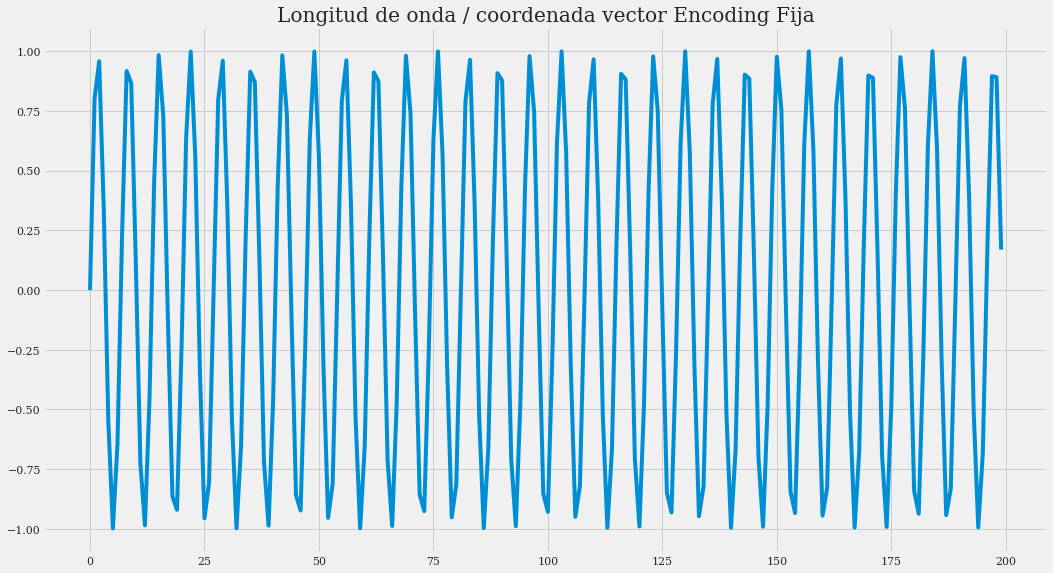

In [70]:
x = np.arange(0, 200, 1)
denominator = np.power(10000, 2*2/512)
y = np.sin(x/denominator)
plt.plot(x, y)
plt.title('Longitud de onda / coordenada vector Encoding Fija')

<span style='background :green'> Podemos ver la forma de la onda para cada posición: </span>

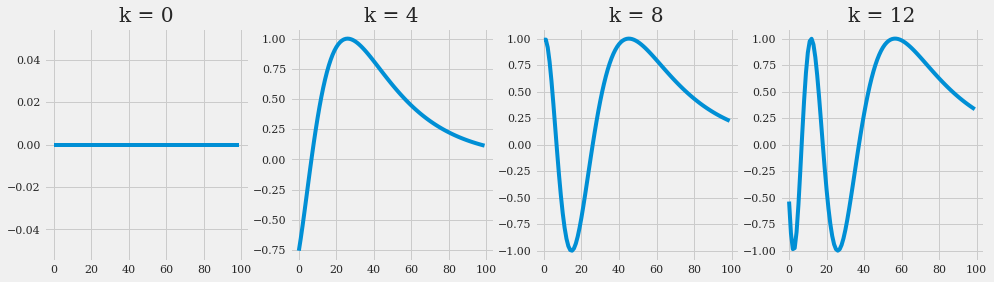

In [72]:
def plotSinusoid(k, d=512, n=10000):
    x = np.arange(0, 100, 1)
    denominator = np.power(n, 2*x/d)
    y = np.sin(k/denominator)
    plt.plot(x, y)
    plt.title('k = ' + str(k))
 
fig = plt.figure(figsize=(15, 4))    
for i in range(4):
    plt.subplot(141 + i)
    plotSinusoid(i*4)

<span style='background :green'> Por último podemos visualizar directamente la forma que tiene un embedding </span>

Text(0.5, 0, 'Coordenada vector encoding')

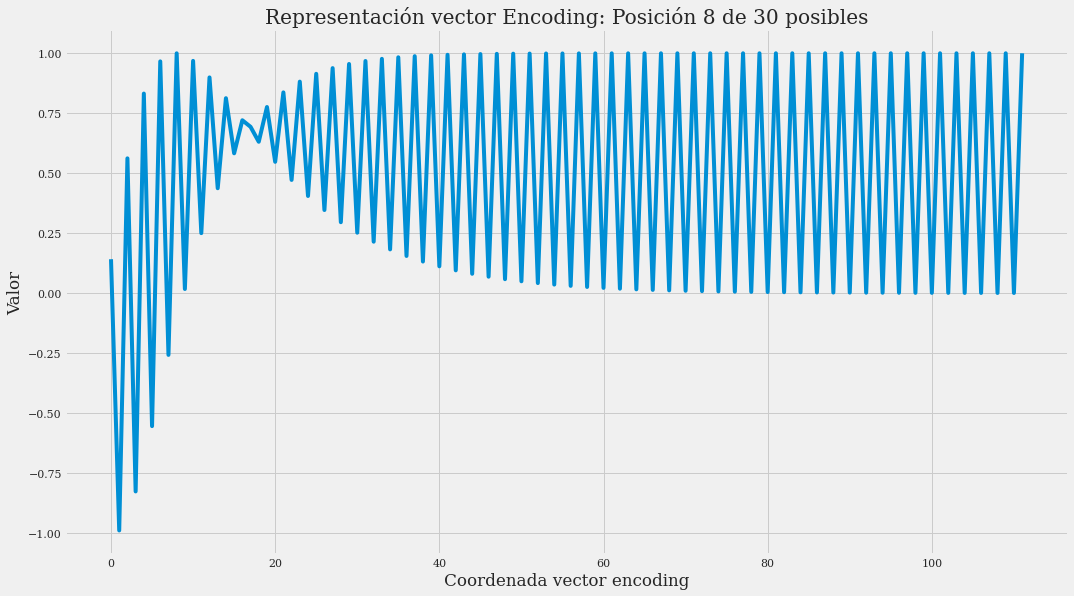

In [79]:
B = getPositionEncoding(seq_len=30, d=112, n=10000)
plt.plot(range(0,112),B[3])
plt.title('Representación vector Encoding: Posición 8 de 30 posibles')
plt.ylabel('Valor')
plt.xlabel('Coordenada vector encoding')

In [86]:
# Información de la session
session_info.show(html=False)

-----
matplotlib          3.4.3
numpy               1.19.5
seaborn             0.11.2
session_info        1.0.0
tensorflow          2.6.0
-----
IPython             7.28.0
jupyter_client      7.0.3
jupyter_core        4.8.1
notebook            6.4.6
-----
Python 3.7.8 (tags/v3.7.8:4b47a5b6ba, Jun 28 2020, 08:53:46) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.19041-SP0
-----
Session information updated at 2022-05-11 18:20


# Más sobre transformers y positional Encoding
* https://www.codetd.com/es/article/12255732
* https://nlp.seas.harvard.edu/2018/04/03/attention.html
* https://jalammar.github.io/illustrated-bert/
* https://github.com/jalammar/jalammar.github.io/blob/master/notebookes/transformer/transformer_positional_encoding_graph.ipynb